# Î™©Ìëú

keywordÍ∞Ä Ìè¨Ìï®Îêú NÍ∞úÏùò reddit ÏµúÏã† Ìè¨Ïä§Ìä∏Î•º Í∞ÄÏ†∏ÏôÄÏÑú Î¨∏Ïû•Ïùò sentiment analiysisÎ•º ÏàòÌñâ  
keywordÏóê ÎåÄÌïú reddit Ïú†Ï†ÄÎì§Ïùò ÎåÄÎûµÏ†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ ÌååÏïÖÏóê ÎèÑÏõÄÏù¥ Îê®  

# ÏùòÏ°¥ÏÑ±

In [29]:
# !pip install praw pyyaml
# !pip install transformers
# !pip install torch==2.3.0

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# WordCloud Í¥ÄÎ†®
from wordcloud import WordCloud
from PIL import Image
# ÌÖçÏä§Ìä∏ ÌååÏã±
import nltk
# Ï†ïÍ∑úÌëúÌòÑÏãù - ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
import re
# WordCloud - ÏÉÅÏúÑ NÍ∞ú ÎπàÏ∂ú Î¨∏Ïûê
from collections import Counter
# Python Reddit Api Wrapper
import praw
# For Inject configuration
import yaml
from datetime import datetime

In [31]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def reddit_search_api(keyword: str, limit: 10):
    conf = None
    with open('resources/application.yml') as f:
        conf = yaml.safe_load(f)['reddit']


    # Reddit Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
    reddit = praw.Reddit(
        client_id=conf['client_id'],     # Reddit Ïï±Ïùò client_id
        client_secret=conf['client_secret'], # Reddit Ïï±Ïùò client_secret
        user_agent=conf['user_agent'],   # ÏûêÏã†ÏùÑ ÏãùÎ≥ÑÌïòÎäî user_agent
        # username='YOUR_USERNAME',       # (ÏòµÏÖò) Reddit ÏÇ¨Ïö©Ïûê Ïù¥Î¶Ñ
        # password='YOUR_PASSWORD'        # (ÏòµÏÖò) Reddit ÎπÑÎ∞ÄÎ≤àÌò∏
    )

    posts = []
    # Ïù∏Í∏∞ ÏÑúÎ∏åÎ†àÎîßÏùò Ïù∏Í∏∞ Ìè¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
    subreddit = reddit.subreddit('All')
    for post in subreddit.search(keyword, limit=limit):
        posts.append({
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'num_comments': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })
        print(f"Ï†úÎ™©: {post.title}, ÏóÖÎ≥¥Ìä∏ Ïàò: {post.score}, ÎßÅÌÅ¨: {post.url}")

    df = pd.DataFrame(posts)
    print(df)
    df.to_json(f'reddit-{keyword}-{str(datetime.now())}.json', force_ascii=False)


In [33]:
keyword = 'Hyundai'
reddit_search_api(keyword, 1000)

Ï†úÎ™©: Why do Americans hate Hyundai but Australia's like Hyundai?, ÏóÖÎ≥¥Ìä∏ Ïàò: 98, ÎßÅÌÅ¨: https://www.reddit.com/r/CarsAustralia/comments/1bx1336/why_do_americans_hate_hyundai_but_australias_like/
Ï†úÎ™©: Why should I NOT buy a Hyundai? , ÏóÖÎ≥¥Ìä∏ Ïàò: 120, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/1aunvj2/why_should_i_not_buy_a_hyundai/
Ï†úÎ™©: Why are Hyundais never recommended?, ÏóÖÎ≥¥Ìä∏ Ïàò: 142, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/15z12vp/why_are_hyundais_never_recommended/
Ï†úÎ™©: What happened to Hyundai/Kia?, ÏóÖÎ≥¥Ìä∏ Ïàò: 0, ÎßÅÌÅ¨: https://www.reddit.com/r/cars/comments/18t7k2z/what_happened_to_hyundaikia/
Ï†úÎ™©: Are Kia & Hyundai still bad brands?, ÏóÖÎ≥¥Ìä∏ Ïàò: 56, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/1auh1e5/are_kia_hyundai_still_bad_brands/
Ï†úÎ™©: Why do you think people buy Hyundai/Kia's ?, ÏóÖÎ≥¥Ìä∏ Ïàò: 386, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/17c1bsu/why_do_you_think_p

In [34]:
import glob
import os

# pathÏóêÏÑú Ìå®ÌÑ¥Ïóê Îß§Ïπ≠ÎêòÎäî ÌååÏùºÏùÑ ÌåêÎã§Ïä§Î°ú ÏùΩÏñ¥ÏÑú Î≥ëÌï© ÌõÑ Î∞òÌôò
def read_reddit_json_files(directory_path, keyword):
    # ÌååÏùº Ìå®ÌÑ¥ Ï†ïÏùò
    file_pattern = os.path.join(directory_path, f'reddit-{keyword}-*.json')
    
    # Ìå®ÌÑ¥Ïóê ÎßûÎäî ÌååÏùº Î™©Î°ù Ï∞æÍ∏∞
    json_files = glob.glob(file_pattern)
    
    # JSON ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    if not json_files:
        print(f"No files found for keyword '{keyword}' in directory '{directory_path}'.")
        return None
    
    # ÌååÏùºÏùÑ ÏùΩÏñ¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
    dfs = []
    for file in json_files:
        try:
            df = pd.read_json(file)
            dfs.append(df)
        except ValueError as e:
            print(f"Error reading {file}: {e}")
    
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú Î≥ëÌï©
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No valid JSON files found.")
        return None


In [35]:
# ÏòàÏãú ÏÇ¨Ïö©
directory_path = ''  # JSON ÌååÏùºÎì§Ïù¥ ÏûàÎäî ÎîîÎ†âÌÑ∞Î¶¨ Í≤ΩÎ°ú
df = read_reddit_json_files(directory_path, keyword)

if df is not None:
    print(df.head(2))

                                               title  score       id  \
0  Why do Americans hate Hyundai but Australia's ...     98  1bx1336   
1                   Why should I NOT buy a Hyundai?     120  1aunvj2   

                                                 url  num_comments  \
0  https://www.reddit.com/r/CarsAustralia/comment...           252   
1  https://www.reddit.com/r/whatcarshouldIbuy/com...           264   

      created                                               body  
0  1712372553  Just curious- \n\nAfter doing travelling I not...  
1  1708351006                                     Do your worst   


In [36]:
df['text'] = df['title'] + df['body']

In [37]:
# ÌóàÍπÖÌéòÏù¥Ïä§, sentiment-analysis Î™®Îç∏ ÏÇ¨Ïö©
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
# Í∞êÏ†ï Î∂ÑÏÑù ÏàòÌñâ Ìï®Ïàò Ï†ïÏùò
def analyze_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']

# ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä, Í∞Å ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Îäî ÏµúÎåÄ 512Ïûê.
df[['sentiment', 'confidence']] = df['text'].apply(lambda x: pd.Series(analyze_sentiment(x[:512])))

df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


title  score       id  \
0    Why do Americans hate Hyundai but Australia's ...     98  1bx1336   
1                     Why should I NOT buy a Hyundai?     120  1aunvj2   
2                  Why are Hyundais never recommended?    142  15z12vp   
3                        What happened to Hyundai/Kia?      0  18t7k2z   
4                  Are Kia & Hyundai still bad brands?     56  1auh1e5   
..                                                 ...    ...      ...   
234  Hyundai boss admits surprise at success of Ion...    730  127dc5i   
235  Hyundai Pony EV, Grandeur EV, N Vision 74(Conc...   2508   w0fc0c   
236  Genesis' New Standalone Dealerships Leave Hyun...   1241  12z6zd4   
237  Almost 52,000 USD out-the-door for a Hyundai S...    333  1bqhwqn   
238  Cargo Ship Carrying 4,000 Hyundais Sliced Open...   3003   ovu1xo   

                                                   url  num_comments  \
0    https://www.reddit.com/r/CarsAustralia/comment...           252   
1    https://www.reddit.com/r/whatcarshouldIbuy/com...           264   
2    https://www.reddit.com/r/whatcarshouldIbuy/com...           448   
3    https://www.reddit.com/r/cars/comments/18t7k2z...           151   
4    https://www.reddit.com/r/whatcarshouldIbuy/com...           101   
..                                                 ...           ...   
234  https://www.autocar.co.uk/car-news/new-cars/hy...           272   
235              https://www.reddit.com/gallery/w0fc0c           147   
236  https://www.motortrend.com/reviews/2022-genesi...           222   
237               https://i.redd.it/loxy9vh9q7rc1.jpeg           281   
238  https://www.reddit.com/r/ThatLookedExpensive/c...           190   

        created                                               body  \
0    1712372553  Just curious- \n\nAfter doing travelling I not...   
1    1708351006                                     Do your worst    
2    1692789984  Besides the fuck up with the immobilizer and c...   
3    1703805130  Pre-2015 Hyundai/Kia had a reputation of being...   
4    1708325751  I came across a couple posts recently that con...   
..          ...                                                ...   
234  1680246802                                                      
235  1657973754                                                      
236  1682485191                                                      
237  1711691780                                                      
238  1627831394  https://interestingengineering.com/cargo-ship-...   

                                                  text sentiment  confidence  
0    Why do Americans hate Hyundai but Australia's ...  POSITIVE    0.991165  
1       Why should I NOT buy a Hyundai? Do your worst   NEGATIVE    0.999687  
2    Why are Hyundais never recommended?Besides the...  NEGATIVE    0.992455  
3    What happened to Hyundai/Kia?Pre-2015 Hyundai/...  NEGATIVE    0.997392  
4    Are Kia & Hyundai still bad brands?I came acro...  NEGATIVE    0.996423  
..                                                 ...       ...         ...  
234  Hyundai boss admits surprise at success of Ion...  POSITIVE    0.991310  
235  Hyundai Pony EV, Grandeur EV, N Vision 74(Conc...  POSITIVE    0.995716  
236  Genesis' New Standalone Dealerships Leave Hyun...  NEGATIVE    0.999567  
237  Almost 52,000 USD out-the-door for a Hyundai S...  NEGATIVE    0.974281  
238  Cargo Ship Carrying 4,000 Hyundais Sliced Open...  NEGATIVE    0.974853  

[239 rows x 10 columns]

In [38]:
def remove_special_symbol(text): # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

In [39]:
positive = df[df['sentiment']=='POSITIVE']
negative = df[df['sentiment']=='NEGATIVE']

In [40]:
# ÌïòÎÇòÏùò ÌÅ∞ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
positive_texts = ' '.join(positive['text'])
negative_texts = ' '.join(negative['text'])

In [41]:
# ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
positive_symbol_removed_texts = remove_special_symbol(positive_texts)
negative_symbol_removed_texts = remove_special_symbol(negative_texts)

In [42]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
positive_tokens = nltk.word_tokenize(positive_symbol_removed_texts)
negative_tokens = nltk.word_tokenize(negative_symbol_removed_texts)

In [43]:
stopwords = nltk.corpus.stopwords.words('english') # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ ÏÑ∏Ìä∏(ÏÜåÎ¨∏Ïûê)

In [44]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
positive_stopwords_removed_tokens = [t.lower() for t in positive_tokens if t.lower() not in stopwords]
negative_stopwords_removed_tokens = [t.lower() for t in negative_tokens if t.lower() not in stopwords]

In [45]:
# Ïπ¥Ïö¥ÌÑ∞ ÏÉùÏÑ±( Îã®Ïñ¥ : ÎπàÎèÑÏàò )
positive_count_set = Counter(positive_stopwords_removed_tokens)
negative_count_set = Counter(negative_stopwords_removed_tokens)

In [46]:
N = 500 # ÏÉÅÏúÑ 50Í∞ú Ìï≠Î™©Îßå ÎèÑÏ∂ú
topN_positive_tokens = positive_count_set.most_common(N)
topN_negative_tokens = negative_count_set.most_common(N)

topN_positive_tokens_dict = dict(topN_positive_tokens)
topN_negative_tokens_dict = dict(topN_negative_tokens)

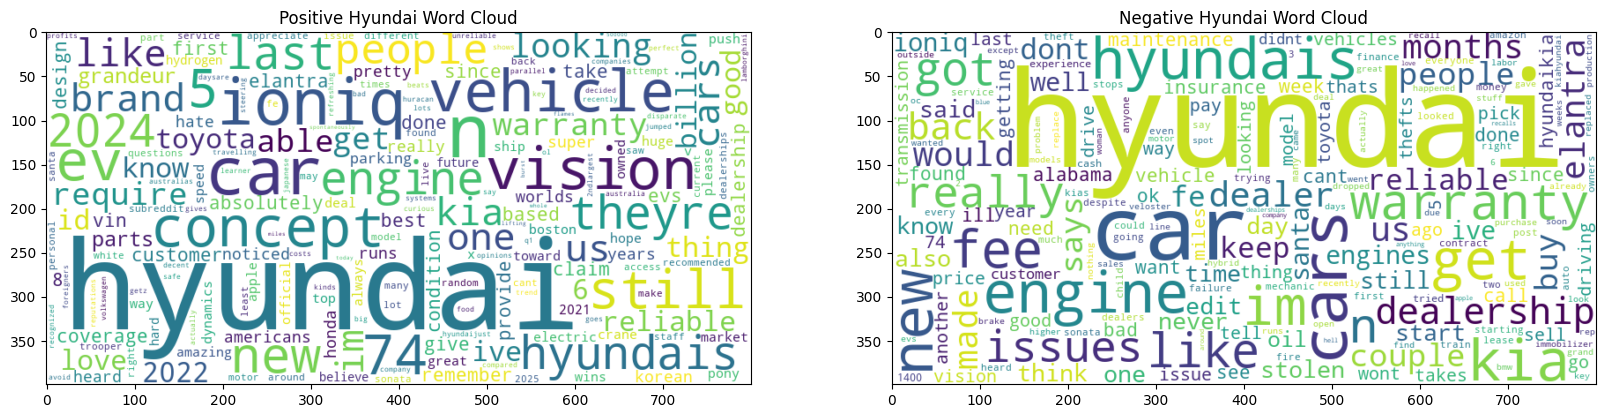

In [47]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wc1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topN_positive_tokens_dict)
wc2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topN_negative_tokens_dict)

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 10))

# Ï≤´ Î≤àÏß∏ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 2, 1)
plt.imshow(wc1, interpolation='bilinear')
# plt.axis('off')
plt.title(f'Positive {keyword} Word Cloud')

# Îëê Î≤àÏß∏ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 2, 2)
plt.imshow(wc2, interpolation='bilinear')
# plt.axis('off')
plt.title(f'Negative {keyword} Word Cloud')

plt.show()